In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_theme(style="darkgrid")

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 可视化

### 表格形式

In [12]:
#数据排序
#.sort_index()根据索引排序，默认纵轴升序，即.sort_index(axis=0,ascending=True)
#.sort_values()
# Series.sort_values(axis=0,ascending=True)
# DataFrame.sort_values(by,axis=0,ascending=True)
#其中by是axis轴上某个索引或索引列表
df_sorted=df.sort_values('sepal_length',axis=0,ascending=True)
df_sorted

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,0
42,4.4,3.2,1.3,0.2,0
38,4.4,3.0,1.3,0.2,0
8,4.4,2.9,1.4,0.2,0
41,4.5,2.3,1.3,0.3,0
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,2
118,7.7,2.6,6.9,2.3,2
117,7.7,3.8,6.7,2.2,2
135,7.7,3.0,6.1,2.3,2


In [14]:
#基本统计
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
#累计统计
cum_df=df.iloc[:,0:4].cumsum()
cum_df
# type(cum_df)#pandas.core.frame.DataFrame
cum_df.iloc[-1:]#dataframe最后一行，累计

,sepal_length,sepal_width,petal_length,petal_width
149,876.5,458.6,563.7,179.9


In [17]:
#窗口计算，依次计算相邻w个元素的统计值，用.rolling(w).sum()计算
df_roll_sum=df.rolling(10).mean()
df_roll_sum

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
145,6.52,3.10,5.39,2.18,2.0
146,6.52,3.01,5.33,2.13,2.0
147,6.53,3.00,5.30,2.15,2.0
148,6.55,3.04,5.36,2.20,2.0


In [18]:
#变量之间相关性，以pearson相关系数为例
#.cov()计算协方差矩阵
#.corr()计算相关系数矩阵，Pearson，Kendall等系数
df_cov=df.cov()
df_cov


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,0.685694,-0.042434,1.274315,0.516271,0.530872
sepal_width,-0.042434,0.189979,-0.329656,-0.121639,-0.152349
petal_length,1.274315,-0.329656,3.116278,1.295609,1.372483
petal_width,0.516271,-0.121639,1.295609,0.581006,0.597315
species,0.530872,-0.152349,1.372483,0.597315,0.671141


In [20]:
df_cor=df.corr(method='pearson')
df_cor

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


## 数据建模/分析预测

### 无监督  聚类，以kmeans为例


In [19]:
import scipy
from scipy.cluster.vq import vq,kmeans,whiten

In [26]:
obs=df.iloc[:,0]

In [27]:
type(obs)

pandas.core.series.Series

In [28]:
data= np.array(obs)
type(data)#numpy.ndarray

In [30]:
whiten=whiten(data)
centroids,_=kmeans(whiten,3)
result,_=vq(whiten,centroids)
print(result)
# type(result)#numpy.ndarray

[0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 0 2 0 0 1 1 1 1 2 1 1 1 1 1 1 2 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 0 1 1 1 1 0 1 2 1 2 2 2 2 0 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2
 1 1]


In [32]:
encoded_col

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
#余弦相似度
from scipy import spatial
res = 1 - spatial.distance.cosine(result, encoded_col)
res

0.9113294688411048

In [41]:
#欧氏距离
from numpy import dot
from numpy.linalg import norm
a=result
b=encoded_col
res = dot(a, b) / (norm(a) * norm(b))
res

0.9113294688411047

### 分类

#### 决策树、随机森林、 GBDT(Gradient Boosting Decision Tree)

In [4]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

[1]


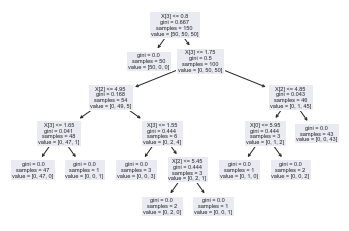

In [5]:
#Decision Treee
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)
print(clf.predict([[6.8, 2.8, 4.8, 1.4]]))

In [6]:
#Random forest
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.predict([[3.0, 4.0, 5.0, 6.0]]))


[2]


In [7]:
#GBDT
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X, y)
clf.feature_importances_
print(clf.predict([[4.3, 3.0, 1.1, 0.1]]))
# sum([0.0039867 , 0.00523416, 0.11383373, 0.87694542])

[0]


#### SVM

In [8]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)
print(clf.predict([[4.3, 3.0, 1.1, 0.1]]))

[0]


### 函数实现

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report
X, y = iris.data, iris.target
 
x_train = []                        # 存放训练集的属性
y_train = []                        # 存放训练集的标签
x_test = []                         # 存放测试集的属性
y_test = []                         # 存放测试集的标签
testSize = 0.2                      # 测试数据所占总数据比重

'''决策树方法'''
def DecisionTree(testSize):
    print('------------------------决策树方法------------------------')
    print('原数据集：')
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    print(clf.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
 
'''随机森林方法'''
def RandomForest(testSize):
    print('------------------------随机森林方法------------------------')
    print('原数据集：')
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    y_predict = rfc.predict(x_test)
    print(rfc.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
 
'''KNN方法'''
def knn(testSize):
    print('------------------------KNN方法------------------------')
    print('原数据集：')
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    print(knn.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
 
'''SVC方法'''
def svc(testSize):
    print('------------------------SVC方法------------------------')
    print('原数据集：')
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=testSize)
    clf = svm.SVC()
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    print(clf.score(x_test, y_test))
    print(classification_report(y_test, y_predict))
######################################################################################
DecisionTree(testSize)
RandomForest(testSize)
knn(testSize)
svc(testSize)


------------------------决策树方法------------------------
原数据集：
0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.81      0.90        16
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.94      0.90        30
weighted avg       0.93      0.90      0.90        30

------------------------随机森林方法------------------------
原数据集：
0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.89      0.94         9
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

------------------------KNN方法------------------------
原数据集：
0.9
              precision    rec

### 回归